In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [31]:
!./experiment_parallel.sh 0.001 

1 
D_left = 0.400, num of timesteps: 1000002, a = -0.002
Using precomputed profile
Dumped in a file a profile for 1.00 seconds

324.417233

In [33]:
results = {}
for num_threads in [1, 4, 6, 12]:
    for dy in np.linspace(1e-3, 4e-4, num=4):
        res = !./experiment_parallel.sh $dy $num_threads
        results[(dy, num_threads)] = res
        print(f"dy-{dy}-num_threads-{num_threads:.5f}")

dy-0.001-num_threads-1.00000
dy-0.0008-num_threads-1.00000
dy-0.0006000000000000001-num_threads-1.00000
dy-0.0004-num_threads-1.00000
dy-0.001-num_threads-4.00000
dy-0.0008-num_threads-4.00000
dy-0.0006000000000000001-num_threads-4.00000
dy-0.0004-num_threads-4.00000
dy-0.001-num_threads-6.00000
dy-0.0008-num_threads-6.00000
dy-0.0006000000000000001-num_threads-6.00000
dy-0.0004-num_threads-6.00000
dy-0.001-num_threads-12.00000
dy-0.0008-num_threads-12.00000
dy-0.0006000000000000001-num_threads-12.00000
dy-0.0004-num_threads-12.00000


In [34]:
import json
with open("results.json", "w", encoding="utf-8") as f:
    json.dump(results, f)

TypeError: keys must be str, int, float, bool or None, not tuple

In [39]:
plotter = {}
for k, v in results.items():
    if k[1] not in plotter:
        plotter[k[1]] = {}
    plotter[k[1]][k[0]] = v

In [40]:
plotter.keys()

dict_keys([1, 4, 6, 12])

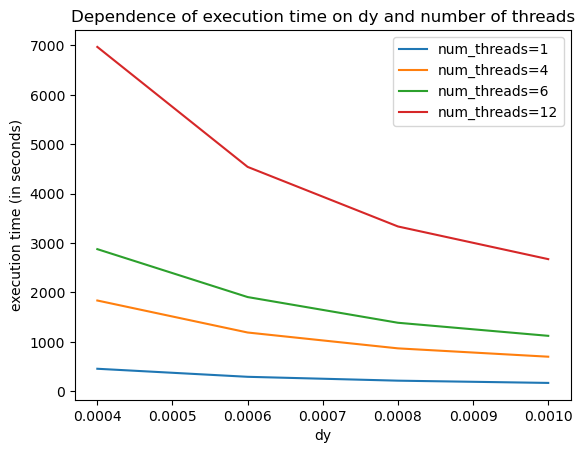

In [43]:
def draw_dependence(dep, num_thr):
    x = list(map(float, dep.keys()))
    y = [float(r[-1]) for r in dep.values()]
    plt.plot(x, y, label=f"num_threads={num_thr}")

plt.title("Dependence of execution time on dy and number of threads")
plt.xlabel("dy")
plt.ylabel("execution time (in seconds)")
for num in plotter.keys():
    draw_dependence(plotter[num], num)
plt.legend()
plt.show()

In [44]:
for dy in np.linspace(1e-3, 1e-4, num=5):
    res = !./experiment_parallel.sh $dy
    results[dy] = res
    print(f"dy-{dy}")

^C
dy-0.001
^C
dy-0.0007750000000000001
^C
dy-0.00055
^C
dy-0.000325
^C
dy-0.0001
